# Rapport analytique données immobilières

In [161]:
!jupyter nbconvert C:\Users\user\Documents\GitHub\immo_TD\notebook_immob_explo.ipynb --to html --TemplateExporter.exclude_input=True


[NbConvertApp] Converting notebook C:\Users\user\Documents\GitHub\immo_TD\notebook_immob_explo.ipynb to html
[NbConvertApp] Writing 286786 bytes to C:\Users\user\Documents\GitHub\immo_TD\notebook_immob_explo.html


## Contexte

Nous allons explorer les données de ventes immobilières en France entre 2018 et 2021. Ces données ont été enrichies avec des données en libre accès (OPENDATA) pour créer un modèle de prédiction de la valeur foncière de biens immobiliers en fonction de certaines informations clés. Tout le développement de l'application a été réalisé en Python en utilisant les packages listés dans le fichier requirements.txt.

Nous avons utilisé les packages suivants
- pandas
- numpy
- matplotlib
- seaborn
- plotly

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## Présentation des jeux de données

Nous avons donc 4 jeux de données qui représentent les ventes immobilières entre 2018 et 2018 qui ont été concaténés. Il contient 1 512 5102 observations, pour 43 variables.

In [93]:
df_2018 = pd.read_csv('Data/valeursfoncieres-2018.txt', sep="|", decimal=",")
df_2019 = pd.read_csv('Data/valeursfoncieres-2019.txt', sep="|", decimal=",")
df_2020 = pd.read_csv('Data/valeursfoncieres-2020.txt', sep="|", decimal=",")
df_2021 = pd.read_csv('Data/valeursfoncieres-2021.txt', sep="|", decimal=",")

In [94]:
df_2018.shape[0] + df_2019.shape[0] + df_2020.shape[0] + df_2021.shape[0]
df = pd.concat([df_2018,df_2019, df_2020, df_2021], axis=0)

In [95]:
# On paramétrise notre display function pour avoir toutes les variables
pd.set_option('display.max_columns', None)
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2018,Vente,109000.0,13.0,NaN,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,73,NaN,1,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,73.0,4.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2018,Vente,109000.0,13.0,NaN,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,73,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2018,Vente,239300.0,4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,163.0,4.0,S,NaN,949.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2018,Vente,239300.0,4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,163.0,4.0,AG,JARD,420.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2018,Vente,239300.0,4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,51.0,2.0,AG,JARD,420.0


Voici toutes les variables disponibles dans notre dataset.

In [96]:
df.columns

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

On regarde le nombre de valeurs unique dans chaque colonne pour enlever les variables qui n'apporte pas d'information

In [97]:
# On regarde le nombre de valeurs unique dans chaque colonne pour enlever les variables qui n'apporte pas d'information
for col in df.columns:
    print(col, " : ",len(df[col].unique()))

Identifiant de document  :  1
Reference document  :  1
1 Articles CGI  :  1
2 Articles CGI  :  1
3 Articles CGI  :  1
4 Articles CGI  :  1
5 Articles CGI  :  1
No disposition  :  694
Date mutation  :  1458
Nature mutation  :  6
Valeur fonciere  :  378224
No voie  :  8953
B/T/Q  :  43
Type de voie  :  148
Code voie  :  20766
Voie  :  997235
Code postal  :  5875
Commune  :  32044
Code departement  :  99
Code commune  :  908
Prefixe de section  :  758
Section  :  589
No plan  :  8226
No Volume  :  2389
1er lot  :  24159
Surface Carrez du 1er lot  :  27268
2eme lot  :  10816
Surface Carrez du 2eme lot  :  17277
3eme lot  :  2873
Surface Carrez du 3eme lot  :  11695
4eme lot  :  1535
Surface Carrez du 4eme lot  :  5051
5eme lot  :  1101
Surface Carrez du 5eme lot  :  2269
Nombre de lots  :  122
Code type local  :  5
Type local  :  5
Identifiant local  :  1
Surface reelle bati  :  8522
Nombre pieces principales  :  66
Nature culture  :  28
Nature culture speciale  :  133
Surface terrain  :  

## Nettoyage du jeu de données

On enlève donc les variables avec une valeur (souvent NaN) ou d'identifiant (qui n'auront donc pas d'intérêt dans la prédiction ou l'exploration)
- Identifiant de document
- Reference document
- 1 Articles CGI
- 2 Articles CGI
- 3 Articles CGI
- 4 Articles CGI
- 5 Articles CGI
- No disposition
- No plan
- Identifiant local
- No Volume

In [98]:
# On enlève donc les variables avec une valeur (souvent NaN) ou d'identifiant (qui n'auront donc pas d'intérêt dans la prédiction ou l'exploration)
df.drop(columns=['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI','No disposition', 'No plan', 'Identifiant local', 'No Volume'], inplace=True)

B/T/Q représente l'indice de répétition qui est est une mention qui complète une numérotation de voirie. L’indice de répétition permet de
différencier plusieurs adresses portant le même numéro dans la même rue. Elle ne nous servira pas donc on l'enlève également.

In [99]:
df.drop(columns=["B/T/Q"], inplace=True)

On regarde le nombre de valeurs manquantes dans chaque colonne pour enlever les variables qui n'apporte pas d'information

In [100]:
# On regarde le nombre de valeurs manquantes dans chaque colonne pour enlever les variables qui n'apporte pas d'information
for col in df.columns:
    print(col," : ", df[col].isnull().sum()/df.shape[0])

Date mutation  :  0.0
Nature mutation  :  0.0
Valeur fonciere  :  0.010980884624778068
No voie  :  0.39393069878140324
Type de voie  :  0.4124630696705384
Code voie  :  0.008502950922248327
Voie  :  0.008520868156789952
Code postal  :  0.008544405188143525
Commune  :  0.0
Code departement  :  0.0
Code commune  :  0.0
Prefixe de section  :  0.9532110262793599
Section  :  3.173532317335777e-05
1er lot  :  0.6884300019927139
Surface Carrez du 1er lot  :  0.9147595169936705
2eme lot  :  0.9262992077673261
Surface Carrez du 2eme lot  :  0.9766547690058553
3eme lot  :  0.9872174085173111
Surface Carrez du 3eme lot  :  0.9975565784614213
4eme lot  :  0.9957234007413636
Surface Carrez du 4eme lot  :  0.9993702521807787
5eme lot  :  0.998045302438291
Surface Carrez du 5eme lot  :  0.9997469107976925
Nombre de lots  :  0.0
Code type local  :  0.43260752886162357
Type local  :  0.43260752886162357
Surface reelle bati  :  0.4333014084797577
Nombre pieces principales  :  0.4333014084797577
Nature c

Le nombre de lot est suffisant pour nous indiquer la présence ou non de lots. Le reste est redondant. On supprime les variables : 
- 1er lot
- Surface Carrez du 1er lot
- 2eme lot
- Surface Carrez du 2eme lot
- 3eme lot
- Surface Carrez du 3eme lot
- 4eme lot
- Surface Carrez du 4eme lot
- 5eme lot
- Surface Carrez du 5eme lot

In [101]:
df.drop(columns=['1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot'], inplace=True)

Nous nous occupons désormais de la variable nature culture spéciale qui nous indique la présence ou non d'un extérieur. La présence d'un terrain est clairement indiquer par la surface présente, donc si elle est de 0: il n'y a pas de terrain. En s'appuyant sur la documentation, on se rend compte que le relatif aux sections n'est pas pertinent, on supprime donc la variable. Il en va de meme pour la variable Nature mutation qui n'est pas pertinente pour notre problématique

In [102]:
df.drop(columns=[ "Nature culture speciale"], inplace=True)

In [103]:
df.loc[df["Nature culture"].isna(), "exterieur"] = 0
df.loc[df["exterieur"].isna(), "exterieur"] = 1
# La présence d'un terrain est clairement indiquer par la surface présente, donc si elle est de 0: il n'y a pas de terrain
df.loc[df["Surface terrain"].isnull(), "Surface terrain"] = 0
# En s'appuyant sur la documentation, on se rend compte que le relatif aux sections n'est pas pertinent
df.drop(columns=["Prefixe de section", "Section"], inplace=True)

In [104]:
# On extrait les différentes modalités prises par Nature mutation
df["Nature mutation"].unique()

array(['Vente', "Vente en l'état futur d'achèvement", 'Echange',
       'Vente terrain à bâtir', 'Adjudication', 'Expropriation'],
      dtype=object)

In [105]:
# On observe que ce n'est pas pertinent pour notre problématique.
df.drop(columns=["Nature mutation"], inplace=True)

La variable en relation avec l'adresse se sépare en plusieurs variables, nous allons donc la concaténer. Si l'adresse est nulle, c'est parce qu'il n'y a pas de n° de voie (lieux dits?), donc on remplie adresse avec "Voie".

In [106]:
df["key"]=  df["No voie"].astype(str)+df["Voie"]+df["Commune"]+df["Date mutation"]

On enlève les références à l'adresse qui ne nous seront d'aucunes utilité. On enlève également le code département qui ne nous servira pas pour récupérer les départements (nous utiliserons le code postal et le nom de la commune). Pour ne garder les ventes que de lots uniques, on enlève toutes les ventes qui se répètent plus d'une fois.

In [107]:
# On enlève les références à l'adresse qui ne nous seront d'aucunes utilité
df.drop(columns=["Type de voie", "Voie", "No voie", "Code voie"], inplace=True)
# On enlève également le code département qui ne nous servira pas pour récupérer les départements (nous utiliserons le code postal et le nom de la commune)
df.drop(columns=["Code departement"], inplace=True)

In [108]:
# Pour ne garder les ventes que de lots uniques, on enlève toutes les ventes qui se répètent plus d'une fois
df2 = df.drop_duplicates(subset='key', keep=False)
df2.shape

(4577310, 14)

In [109]:
# On change le format de la date de vente en format datetime.
df2.loc[:, 'Date mutation'] = pd.to_datetime(df2['Date mutation'] , format='%d/%m/%Y')
# On récupère le mois et l'année de la vente.
df2.loc[:, 'year'] = pd.DatetimeIndex(df2['Date mutation']).year
df2.loc[:, 'month'] = pd.DatetimeIndex(df2['Date mutation']).month
# On enlève la clé qui nous a servi à enlever les duplicatas et la date entière qui ne nous sert plus
df2.drop(columns=["Date mutation", "key"], inplace=True)
# Si NaN values dans ces variables de surfaces ou nombre de pièces principales, 0 assigné
df2.loc[df2["Surface reelle bati"].isnull(), "Surface reelle bati"] = 0
df2.loc[df2["Surface terrain"].isnull(), "Surface terrain"] = 0
df2.loc[df2["Nombre pieces principales"].isnull(), "Nombre pieces principales"] = 0
# On enlève la clé qui nous a servi à enlever les duplicatas et la date entière qui ne nous sert plus
df2.drop(columns=["Nature culture"], inplace=True)
# On enlève la clé qui nous a servi à enlever les duplicatas et la date entière qui ne nous sert plus
df2.drop(columns=["Code type local"], inplace=True)
df2.loc[df2["Type local"].isna(), "Type local"] = "Autres"

In [110]:
for col in df2.columns:
    print(col," : ",df2[col].isnull().sum())

Valeur fonciere  :  23421
Code postal  :  214
Commune  :  0
Code commune  :  0
Nombre de lots  :  0
Type local  :  0
Surface reelle bati  :  0
Nombre pieces principales  :  0
Surface terrain  :  0
exterieur  :  0
year  :  0
month  :  0


In [111]:
# On enlève les lignes avec des valeurs nulles
df2 = df2.dropna()

In [112]:
for col in df2.columns:
    print(col)
    print(df2[col].isnull().sum())

Valeur fonciere
0
Code postal
0
Commune
0
Code commune
0
Nombre de lots
0
Type local
0
Surface reelle bati
0
Nombre pieces principales
0
Surface terrain
0
exterieur
0
year
0
month
0


Certains biens sont à l'euro symbolique ou ont un prix inférieur à 100€, nous enlevons ces biens

([<matplotlib.patches.Wedge at 0x2205e64bc50>,
 [Text(-1.0995429208157466, 0.03170749570649091, ''),
  Text(1.0995429192386392, -0.03170755039689271, '')],
 [Text(-0.5997506840813162, 0.017294997658085946, '99%'),
  Text(0.5997506832210758, -0.0172950274892142, '1%')])

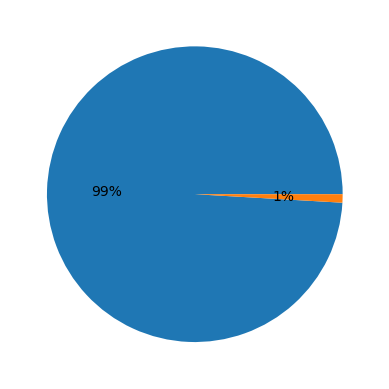

In [113]:
# On visualise le pourcentage de biens avec un prix de vente inférieur à 100€.
euro_symbol = (df2["Valeur fonciere"] < 100).value_counts()

plt.pie(euro_symbol, autopct='%.0f%%')

On ne garde que les biens ayant eu un prix de vente supérieur à 100€.

In [114]:
# On ne garde que les biens ayant eu un prix de vente supérieur à 100€.
df3 = df2[df2["Valeur fonciere"] > 100]

Voici à quoi ressemble notre jeu de données maintenant

In [115]:
df3.head()

,Valeur fonciere,Code postal,Commune,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,month
7,90000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Maison,150.0,3.0,347.0,1.0,2018,1
9,3150.0,1160.0,PONT-D AIN,304,0,Autres,0.0,0.0,126.0,1.0,2018,1
10,2100.0,1250.0,JASSERON,195,0,Autres,0.0,0.0,197.0,1.0,2018,1
11,67000.0,1000.0,BOURG-EN-BRESSE,53,1,Appartement,45.0,1.0,0.0,0.0,2018,1
12,76200.0,1000.0,BOURG-EN-BRESSE,53,2,Appartement,68.0,3.0,0.0,0.0,2018,1


On récupère les différents quartiles pour pouvoir enlever les biens avec un prix anormalement hauts comparés aux autres biens. On calcule le rang interquartile. On détexte les biens ayant un prix supérieur au troisième quartile multiplié par 1.5 fois le rang interquartile

In [116]:
# On récupère les différents quartiles pour pouvoir enlever les biens avec un prix anormalement hauts comparés aux autres biens.
Q1, Q2, Q3 = df3['Valeur fonciere'].quantile([0.25, 0.5, 0.75])

# On calcule le rang interquartile
IQR = Q3-Q1

([<matplotlib.patches.Wedge at 0x22308f16a50>,
 [Text(-1.0828180000568592, 0.19366253833114905, ''),
  Text(1.0828179932573603, -0.1936625763489254, '')],
 [Text(-0.590628000031014, 0.10563411181699038, '94%'),
  Text(0.5906279963221964, -0.10563413255395929, '6%')])

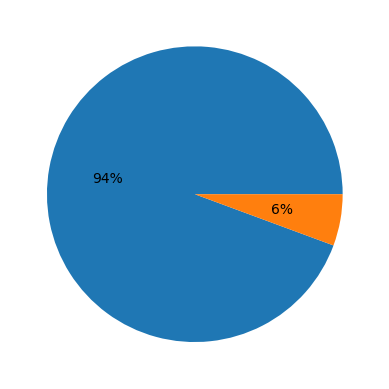

In [117]:
# On détexte les biens ayant un prix supérieur au troisième quartile multiplié par 1.5 fois le rang interquartile
outliers_max = df3["Valeur fonciere"] > (Q3 + 1.5*(IQR))
plt.pie(outliers_max.value_counts(), autopct='%.0f%%')

In [118]:
df3.shape

(4505856, 12)

In [119]:
# On ne garde que les biens n'ayant pas un prix de vente anormalement haut.
df3 = df3[df3["Valeur fonciere"] < (Q3 + 1.5*(IQR))]

## Liaison avec données des départements et communes

On récupère la base de données des communes/département

In [120]:
# On récupère la base de données des communes/département
departement = pd.read_csv("Data/communes-departement-region.csv")
departement.head()

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region
0,1001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,NaN,46.153426,4.926114,1.0,L',Abergement-Clémenciat,L'Abergement-Clémenciat,1,Ain,84.0,Auvergne-Rhône-Alpes
1,1002,L ABERGEMENT DE VAREY,1640,L ABERGEMENT DE VAREY,NaN,46.009188,5.428017,2.0,L',Abergement-de-Varey,L'Abergement-de-Varey,1,Ain,84.0,Auvergne-Rhône-Alpes
2,1004,AMBERIEU EN BUGEY,1500,AMBERIEU EN BUGEY,NaN,45.960848,5.372926,4.0,NaN,Ambérieu-en-Bugey,Ambérieu-en-Bugey,1,Ain,84.0,Auvergne-Rhône-Alpes
3,1005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,NaN,45.996180,4.912273,5.0,NaN,Ambérieux-en-Dombes,Ambérieux-en-Dombes,1,Ain,84.0,Auvergne-Rhône-Alpes
4,1006,AMBLEON,1300,AMBLEON,NaN,45.749499,5.594320,6.0,NaN,Ambléon,Ambléon,1,Ain,84.0,Auvergne-Rhône-Alpes


In [121]:
# On ne garde que les variables qui nous serviront à cartographier nos données
departement  = departement.loc[:,["code_postal", "nom_commune", "nom_departement","nom_region", "latitude", "longitude"]]
# On met en majuscule le nom des communes pour joindre les bases de données
departement["nom_commune"] = departement["nom_commune"].str.upper()

In [122]:
# On fait une jointure interne entre les deux bases de données
df4  = pd.merge(df3, departement, left_on=['Commune', 'Code postal'], right_on=['nom_commune', 'code_postal'], how='inner')

In [123]:
# On change le type de pièces principales pour la visualisation
df4["Nombre pieces principales"] = df4["Nombre pieces principales"].astype(int)
# On raccourcit le nom de ce type de local pour la visualisation
df4.loc[df4["Type local"] == 'Local industriel. commercial ou assimilé', "Type local"] = "Local"

<Axes: xlabel='Surface terrain', ylabel='Valeur fonciere'>

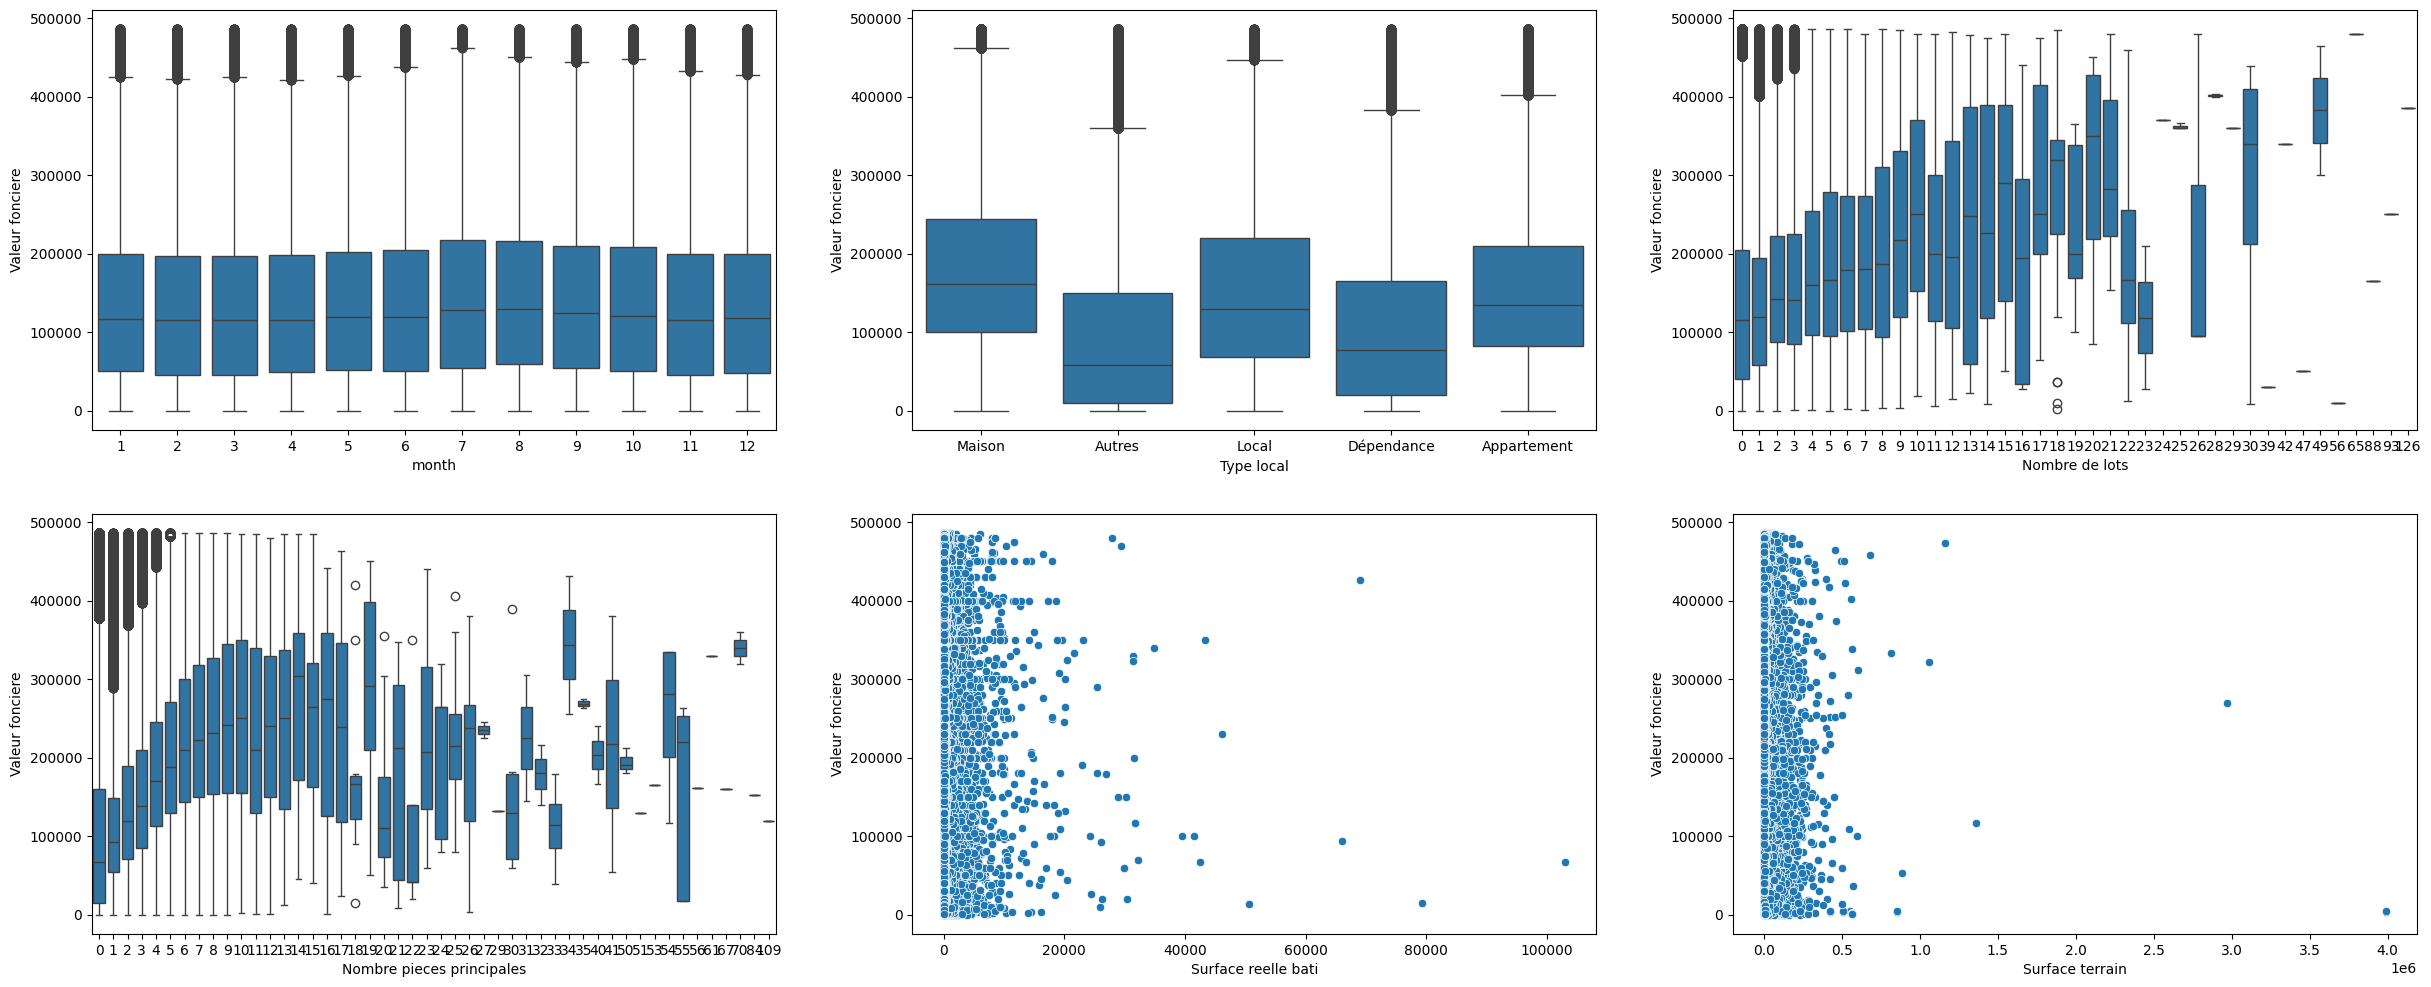

In [124]:
fig, axes = plt.subplots(2, 3,figsize=(30,12))

#create boxplot in each subplot
sns.boxplot(data=df4, x="month", y="Valeur fonciere", ax=axes[0,0])
sns.boxplot(data=df4, x="Type local", y="Valeur fonciere", ax=axes[0,1])
sns.boxplot(data=df4, x="Nombre de lots", y="Valeur fonciere", ax=axes[0,2])
sns.boxplot(data=df4, x="Nombre pieces principales", y="Valeur fonciere", ax=axes[1,0])
sns.scatterplot(data=df4, x="Surface reelle bati", y="Valeur fonciere", ax=axes[1,1])
sns.scatterplot(data=df4, x="Surface terrain", y="Valeur fonciere", ax=axes[1,2])

In [125]:
month_dict_fr = {
    1: 'Janvier',
    2: 'Février',
    3: 'Mars',
    4: 'Avril',
    5: 'Mai',
    6: 'Juin',
    7: 'Juillet',
    8: 'Août',
    9: 'Septembre',
    10: 'Octobre',
    11: 'Novembre',
    12: 'Décembre'
}


In [126]:
df4["month"] = [month_dict_fr[month] for month in df4["month"]]

In [127]:
df4.head()

,Valeur fonciere,Code postal,Commune,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,month,code_postal,nom_commune,nom_departement,nom_region,latitude,longitude
0,90000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Maison,150.0,3,347.0,1.0,2018,Janvier,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571
1,7300.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0,344.0,1.0,2018,Janvier,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571
2,60000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0,210.0,1.0,2018,Janvier,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571
3,60000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0,798.0,1.0,2018,Janvier,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571
4,69000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0,979.0,1.0,2018,Février,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571


In [128]:
pivot_table = pd.pivot_table(df4, values='Valeur fonciere', index=['nom_region', 'nom_departement', 'year', 'month'], aggfunc='mean')
pivot_table_df = pd.DataFrame(pivot_table).reset_index()

pivot_table.to_csv('C:/Users/user/Documents/GitHub/immo_TD/table_croisee.csv')

In [129]:
order_month = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']


Sur ce graphique , on peut observer la variation de la valeur foncière tout au long de l'année.

In [ ]:
import nbformat
fig = px.box(df4, x="month", y="Valeur fonciere", category_orders={'month': order_month}, color="month")

fig.show()

In [131]:
pivot_departement = df4.pivot_table(index=["nom_departement","month"], values="Valeur fonciere", aggfunc="mean").reset_index()
pivot_departement

,nom_departement,month,Valeur fonciere
0,Ain,Août,163701.393680
1,Ain,Avril,143599.392546
2,Ain,Décembre,138901.500705
3,Ain,Février,136412.926154
4,Ain,Janvier,140093.377314
...,...,...,...
1159,Yvelines,Mai,224805.868248
1160,Yvelines,Mars,212466.261230
1161,Yvelines,Novembre,215346.613407
1162,Yvelines,Octobre,223668.854705


In [132]:
months_order = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# Create a categorical data type with the order of months
month_cat = pd.CategoricalDtype(categories=months_order, ordered=True)

# Convert the 'month' column to the categorical data type
pivot_departement['month'] = pivot_departement['month'].astype(month_cat)

# Now sort by the 'month' column
pivot_departement = pivot_departement.sort_values(by='month')

Sur ce graphique , on peut observer la variation de la valeur foncière en fonction du département.

In [ ]:
fig = px.line(pivot_departement, x="month", y="Valeur fonciere", color='nom_departement')
fig.show()

In [134]:
pivot_region = df4.pivot_table(index=["nom_region","month"], values="Valeur fonciere", aggfunc="mean").reset_index()

# Convert the 'month' column to the categorical data type
pivot_region['month'] = pivot_region['month'].astype(month_cat)

# Now sort by the 'month' column
pivot_region = pivot_region.sort_values(by='month')

Sur ce graphique , on peut observer la variation de la valeur foncière en fonction de la région.

In [ ]:

fig = px.line(pivot_region, x="month", y="Valeur fonciere", color='nom_region')
fig.show()

# Map

In [136]:
df4.head()

,Valeur fonciere,Code postal,Commune,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,month,code_postal,nom_commune,nom_departement,nom_region,latitude,longitude
0,90000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Maison,150.0,3,347.0,1.0,2018,Janvier,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571
1,7300.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0,344.0,1.0,2018,Janvier,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571
2,60000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0,210.0,1.0,2018,Janvier,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571
3,60000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0,798.0,1.0,2018,Janvier,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571
4,69000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0,979.0,1.0,2018,Février,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571


In [137]:
mean_values = pd.pivot_table(data=df4, index=["longitude", "latitude"], values="Valeur fonciere", aggfunc="mean")
mean_values = mean_values.reset_index()
mean_values

,longitude,latitude,Valeur fonciere
0,-61.779579,16.303798,146256.557101
1,-61.754179,16.143722,142566.181338
2,-61.719296,16.045514,113274.779744
3,-61.690102,16.033779,159319.548957
4,-61.686418,15.993902,155072.902439
...,...,...,...
21510,55.421339,-21.233927,142396.880427
21511,55.458604,-21.144166,100545.672000
21512,55.508238,-21.046919,73868.957059
21513,55.619585,-21.023328,137034.653746


In [138]:
mean_values.head()

,longitude,latitude,Valeur fonciere
0,-61.779579,16.303798,146256.557101
1,-61.754179,16.143722,142566.181338
2,-61.719296,16.045514,113274.779744
3,-61.690102,16.033779,159319.548957
4,-61.686418,15.993902,155072.902439


<Axes: ylabel='Frequency'>

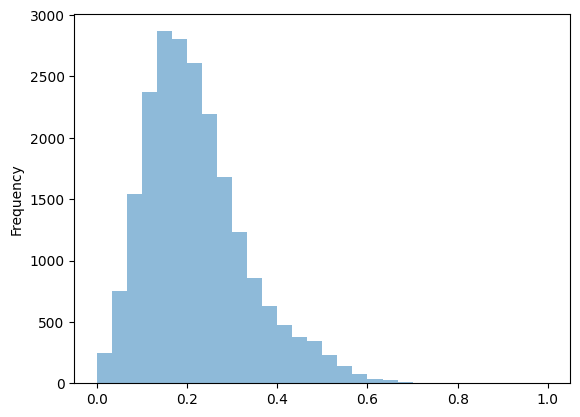

In [139]:
mean_values['normalized_value'] = (mean_values['Valeur fonciere'] -mean_values['Valeur fonciere'].min()) / (mean_values['Valeur fonciere'].max() - mean_values['Valeur fonciere'].min())
mean_values['normalized_value'].plot.hist(bins=30, alpha=0.5)


Voici la carte de la france avec un degradé de couleur suivant la valeur foncière, on observe logiquement que l'ile de la france et les plus grandes villes possèdent la valeur foncière la plus haute.

In [ ]:
fig = px.scatter_geo(mean_values,
                     lat='latitude',
                     lon='longitude',
                     scope='europe', 
                    color='Valeur fonciere',
                     color_continuous_scale='Inferno',
                     # Centré sur la france
                     center=dict(lat=46.26, lon=2.52),
                     # Normalisé car doit être en 0 et 1
                     opacity=mean_values["normalized_value"])

#On update la map pour la centrer sur la france
fig.update_layout(
    autosize=True,
    height=600,
    geo=dict(
        center=dict(
            lat=46.26,
            lon=2.52
        ),
        scope='europe',
        projection_scale=6
    )
)
fig.show()

### Polygons de DataGouv: https://www.data.gouv.fr/fr/datasets/contours-des-communes-de-france-simplifie-avec-regions-et-departement-doutre-mer-rapproches/

In [141]:
import json

In [142]:
mean_values_json = pd.pivot_table(data=df4, index=["nom_region"], values="Valeur fonciere", aggfunc="mean")
mean_values_json = mean_values_json.reset_index()
mean_values_json

,nom_region,Valeur fonciere
0,Auvergne-Rhône-Alpes,140339.636889
1,Bourgogne-Franche-Comté,93709.791664
2,Bretagne,134788.434725
3,Centre-Val de Loire,108479.394553
4,Corse,142444.630483
5,Grand Est,99314.216636
6,Guadeloupe,134420.680600
7,Guyane,134975.596933
8,Hauts-de-France,131574.359498
9,La Réunion,163072.696808


In [143]:
mean_values_json.loc[mean_values_json["nom_region"] == "Nouvelle-Aquitaine", "nom_region"] = "Nouvelle Aquitaine"
mean_values_json.loc[mean_values_json["nom_region"] == "Grand Est", "nom_region"] = "Grand-Est"

In [144]:
with open("Data/regions.json", "r") as file:
    regions_data = json.load(file)

La carte de la France correspondant à la  valeur foncière moyenne par région

In [ ]:
# Create the choropleth map
fig = px.choropleth(
    mean_values_json,  # replace df with your DataFrame
    geojson=regions_data,
    locations='nom_region',  # replace 'id' with the column name containing the regions' ids
    color='Valeur fonciere',  # replace 'value' with the column name containing the values you want to plot
    color_continuous_scale='Inferno',
    featureidkey="properties.libgeo",  # replace 'properties.id' with the path to the ids in the geojson
    range_color=[100000, 250000]
)

# Update the geos layout to focus on France
fig.update_geos(
    center={"lat": 46.603354, "lon": 1.888334},  # Coordinates of France's centroid
    projection_scale=15,  # Adjust the scale to fit France
    visible=False  # Hide the base map
)

# Update the layout
fig.update_layout(
    title="Choropleth Map of France",
    margin={"r":0,"t":40,"l":0,"b":0}
)

# Show the map
fig.show()

In [146]:
with open("Data/departement.json", "r") as file:
    dep_data = json.load(file)

In [147]:
mean_values_json_departement = pd.pivot_table(data=df4, index=["nom_departement"], values="Valeur fonciere", aggfunc="mean")
mean_values_json_departement = mean_values_json_departement.reset_index()
mean_values_json_departement

,nom_departement,Valeur fonciere
0,Ain,145011.319333
1,Aisne,88177.572367
2,Allier,78420.351116
3,Alpes-Maritimes,159515.269030
4,Alpes-de-Haute-Provence,118616.706569
...,...,...
92,Vendée,115242.119491
93,Vienne,88732.840569
94,Vosges,67587.950664
95,Yonne,83883.844964


La carte correspondant au valeur foncière moyenne par département

In [ ]:
# Create the choropleth map
fig = px.choropleth(
    mean_values_json_departement,  # replace df with your DataFrame
    geojson=dep_data,
    locations='nom_departement',  # replace 'id' with the column name containing the regions' ids
    color='Valeur fonciere',  # replace 'value' with the column name containing the values you want to plot
    color_continuous_scale='Inferno',
    featureidkey="properties.libgeo"  # replace 'properties.id' with the path to the ids in the geojson
)

# Update the geos layout to focus on France
fig.update_geos(
    center={"lat": 46.603354, "lon": 1.888334},  # Coordinates of France's centroid
    projection_scale=15,  # Adjust the scale to fit France
    visible=False  # Hide the base map
)

# Update the layout
fig.update_layout(
    title="Choropleth Map of France",
    margin={"r":0,"t":40,"l":0,"b":0}
)

# Show the map
fig.show()

## Variables supplémentaires et opendata

### Population active

Nous avons récupéré la population active par département: https://www.insee.fr/fr/statistiques/2012710#titre-bloc-1

In [149]:
pop = pd.read_excel("Data/pop_active.xlsx")

On fait une jointure interne entre les deux bases de données

In [150]:
df5  = pd.merge(df4, pop, on="nom_departement", how='inner')

### Salaire Net Horaire Moyen par département (2021)

Nous avons récupéré le salaire net horaire moyen par département: https://www.insee.fr/fr/statistiques/2021266

In [151]:
# On importe le salaire horaire moyen
salaire = pd.read_excel("Data/base-cc-bases-tous-salaries-2021.xlsx")

On fait une jointure interne entre les deux bases de données

In [152]:
# On fait une jointure interne entre les deux bases de données
df5  = pd.merge(df5, salaire, on="nom_departement", how='inner')

On observe que le salaire moyen est un peu corrélé avec la valeur foncière on conserve cette variable pour l'utilser dans notre modèle

In [153]:
# On crée une matrice de corrélation
matrix = df5.loc[:,['Valeur fonciere', 'Nombre de lots', 'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain', "pop_active", "salaire_moyen"]].corr()
matrix

,Valeur fonciere,Nombre de lots,Surface reelle bati,Nombre pieces principales,Surface terrain,pop_active,salaire_moyen
Valeur fonciere,1.000000,0.074827,0.110982,0.372435,-0.073682,0.288318,0.290083
Nombre de lots,0.074827,1.000000,0.000544,0.003551,-0.097384,0.222079,0.329686
Surface reelle bati,0.110982,0.000544,1.000000,0.176307,-0.008648,-0.001502,-0.019695
Nombre pieces principales,0.372435,0.003551,0.176307,1.000000,-0.111696,0.062579,-0.019291
Surface terrain,-0.073682,-0.097384,-0.008648,-0.111696,1.000000,-0.077409,-0.065192
pop_active,0.288318,0.222079,-0.001502,0.062579,-0.077409,1.000000,0.642677
salaire_moyen,0.290083,0.329686,-0.019695,-0.019291,-0.065192,0.642677,1.000000


### Nombre d'écoles par département

Nous avons récupéré le nombre d'écoles par département : https://www.observatoire-des-territoires.gouv.fr/nombre-decoles-elementaires

In [154]:
# On importe le dataset avec le nombre d'écoles élémentaires par commune
ecole = pd.read_excel("Data/ecoles2.xlsx")

On fait une jointure interne entre les deux bases de données

In [155]:
# On fait une jointure interne entre les deux bases de données
df6  = pd.merge(df5, ecole, on="nom_departement", how='inner')
